<a href="https://colab.research.google.com/github/AlishbaMalik687-svg/AI-ML-internship_task3/blob/master/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* Heart Disease Prediction
* Dataset:
 Heart Disease UCI Dataset




Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,roc_auc_score, ConfusionMatrixDisplay

!pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 4.0 MB/s eta 0:00:00


Uploading Dataset

In [ ]:
df=pd.read_csv('/content/HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


●	Perform Exploratory Data Analysis (EDA) to understand trends.

In [ ]:
profile = ProfileReport(
    df,
    title="Heart Disease Dataset Profiling Report",
    explorative=True
)
profile.to_file("heart_disease_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 54.54it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

●	Train a classification model (Logistic Regression or Decision Tree).

Split 'Target' and 'Feature'

In [ ]:
A=df.drop([ 'sex' ,'target'],axis=1)
B=df['target']

Split 'Test' and 'Train'

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=42)   #80% training and 20% testing

print('A Train:',A_train.shape)
print('A Test:',A_test.shape)
print('B Train:',B_train.shape)
print('B Test:',B_test.shape)

A Train: (820, 12)
A Test: (205, 12)
B Train: (820,)
B Test: (205,)


Standard Scaler

In [ ]:
A_train = A_train.select_dtypes(include=['int64', 'float64'])  #ye sirf numeric values ko select krega
A_test  = A_test.select_dtypes(include=['int64', 'float64'])  # int64 and float64

sc=StandardScaler()
A_train=sc.fit_transform(A_train)   #training data ka mean & std learn karta hai, data ko scale karta hai
A_test=sc.transform(A_test)  #sirf transform kiya


Model: Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(A_train,B_train)
dt_pred=dt.predict(A_test)

Accuracy

In [ ]:
print('Accuracy:', accuracy_score(B_test, dt_pred))   #model ki accuracy print hogi

Accuracy: 0.9853658536585366


Confusion Matrix

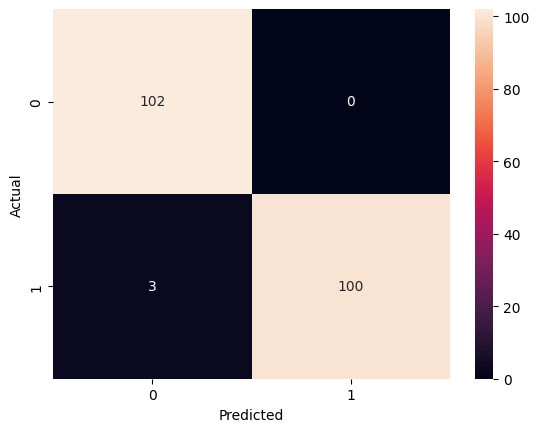

[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
cm = confusion_matrix(B_test, dt_pred)  #B_test → actual values  lr_pred → model ki predicted values

sns.heatmap(cm, annot=True, fmt="d")  #annot=True → numbers box ke andar show honge ,fmt="d" → integer format
plt.xlabel("Predicted")  # columns = predicted
plt.ylabel("Actual")  #rows = actual

plt.show()

print(confusion_matrix(B_test, dt_pred))
print(classification_report(B_test, dt_pred))

ROC curve

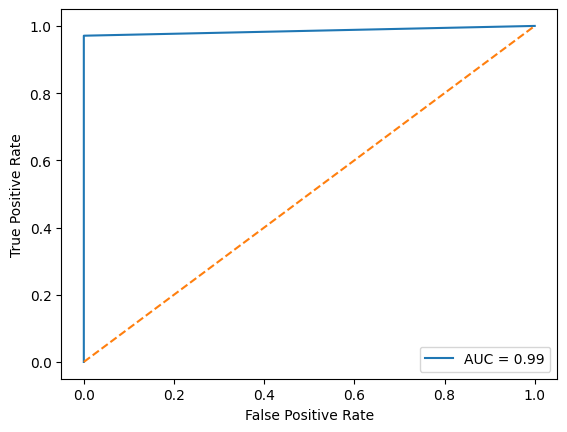

In [ ]:
y_prob = dt.predict_proba(A_test)[:,1]   #class ki probability deta hai  class 1 ki probability li hai kyunki ROC curve positive class pe banta hai.

fpr, tpr, thresholds = roc_curve(B_test, y_prob)   #Ye 3 cheezen deta hai:False Positive Rate, True Positive Rate (Recall), Different probability cutoffs

plt.plot(fpr, tpr, label="AUC = %0.2f" % roc_auc_score(B_test, y_prob))  #Ye actual ROC curve hai. Legend me AUC score show hota hai.
plt.plot([0,1],[0,1],'--')  #Ye random model ko represent karti hai. Agar curve is line ke upar hai mean model acha hai
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
